# covid_19 Project

In [147]:
# Importing Required libraries

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [149]:
df=pd.read_csv('csse_covid19.csv')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [150]:
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


In [151]:
df.drop(df.columns[[1,2,14,15,16]], axis = 1, inplace = True)

In [152]:
df

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,NaN
2,American Samoa,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,NaN
3,Arizona,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,10.693584
5,California,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,NaN
6,Colorado,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,17.348774
7,Connecticut,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,28.054438
8,Delaware,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,NaN
9,Diamond Princess,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,NaN


In [153]:
df.shape

(58, 13)

In [154]:
df.dtypes

Province_State           object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
Hospitalization_Rate    float64
dtype: object

In [155]:
le=LabelEncoder()
df['Province_State']=le.fit_transform(df['Province_State'])
df['Province_State']

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
52    52
53    53
54    54
55    55
56    56
57    57
Name: Province_State, dtype: int32

In [156]:
df.columns

Index(['Province_State', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'FIPS', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     int32  
 1   Lat                   56 non-null     float64
 2   Long_                 56 non-null     float64
 3   Confirmed             58 non-null     int64  
 4   Deaths                58 non-null     int64  
 5   Recovered             42 non-null     float64
 6   Active                58 non-null     float64
 7   FIPS                  58 non-null     int64  
 8   Incident_Rate         56 non-null     float64
 9   People_Tested         56 non-null     float64
 10  People_Hospitalized   33 non-null     float64
 11  Mortality_Rate        57 non-null     float64
 12  Hospitalization_Rate  33 non-null     float64
dtypes: float64(9), int32(1), int64(3)
memory usage: 5.8 KB


In [158]:
df.describe()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Hospitalization_Rate
count,58.000000,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,33.000000
mean,28.500000,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,14.342541
std,16.886879,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,5.047403
min,0.000000,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,6.778043
25%,14.250000,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,10.000000
50%,28.500000,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,13.598326
75%,42.750000,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,17.658649
max,57.000000,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,28.054438


In [159]:
df.Province_State.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57])

In [160]:
# Data visualizations

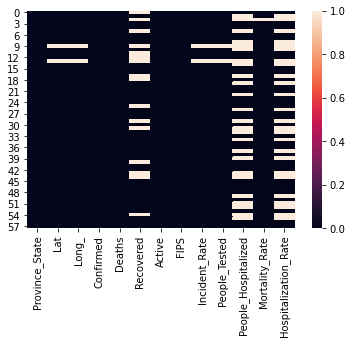

In [161]:
sns.heatmap(df.isnull())

In [162]:
df.isnull()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Hospitalization_Rate
0,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,True
2,False,False,False,False,False,True,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,True,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,True,False,True
9,False,True,True,False,False,True,False,False,True,True,True,False,True


In [163]:
df.isnull().sum()

Province_State           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
Hospitalization_Rate    25
dtype: int64

In [164]:
df.mean()

Province_State              28.500000
Lat                         36.840089
Long_                      -85.206614
Confirmed                26756.086207
Deaths                    1611.017241
Recovered                 7007.428571
Active                   20070.724138
FIPS                      3288.086207
Incident_Rate              396.230806
People_Tested           225853.410714
People_Hospitalized       4897.454545
Mortality_Rate               4.458248
Hospitalization_Rate        14.342541
dtype: float64

In [165]:
df.fillna(df.mean(), inplace=True)

In [166]:
df.isnull().sum()

Province_State          0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
Hospitalization_Rate    0
dtype: int64

In [167]:
# To check Correlation

In [168]:
dfcor=df.corr()
dfcor

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Hospitalization_Rate
Province_State,1.000000,0.153948,0.089445,0.006490,0.015229,0.067595,-0.027612,-0.195045,-0.078280,-0.065428,0.005461,0.019090,-0.131694
Lat,0.153948,1.000000,-0.278274,0.120391,0.119685,0.030196,0.119635,-0.000404,0.245693,0.084769,0.026456,-0.134906,-0.066255
Long_,0.089445,-0.278274,1.000000,0.009951,0.028690,-0.041588,0.011604,0.000396,0.041318,-0.077781,0.079677,0.297192,0.071381
Confirmed,0.006490,0.120391,0.009951,1.000000,0.982191,0.822547,0.985218,-0.096696,0.708436,0.824136,0.869267,0.382537,0.287471
Deaths,0.015229,0.119685,0.028690,0.982191,1.000000,0.830223,0.954378,-0.075053,0.710105,0.739634,0.908279,0.427127,0.298225
Recovered,0.067595,0.030196,-0.041588,0.822547,0.830223,1.000000,0.725085,-0.000012,0.542795,0.711255,0.761829,0.322160,0.231692
Active,-0.027612,0.119635,0.011604,0.985218,0.954378,0.725085,1.000000,-0.092276,0.700926,0.826144,0.835938,0.367626,0.284564
FIPS,-0.195045,-0.000404,0.000396,-0.096696,-0.075053,-0.000012,-0.092276,1.000000,-0.000237,-0.000209,0.000009,-0.262178,-0.000118
Incident_Rate,-0.078280,0.245693,0.041318,0.708436,0.710105,0.542795,0.700926,-0.000237,1.000000,0.441669,0.551076,0.353882,0.196029
People_Tested,-0.065428,0.084769,-0.077781,0.824136,0.739634,0.711255,0.826144,-0.000209,0.441669,1.000000,0.642091,0.220200,0.252680


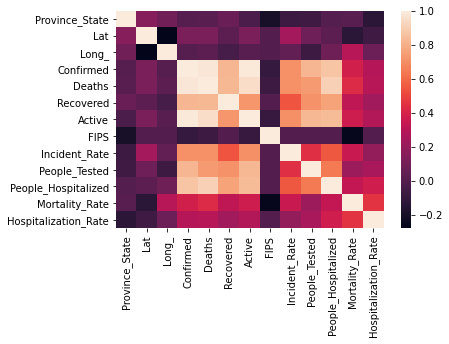

In [169]:
sns.heatmap(dfcor)

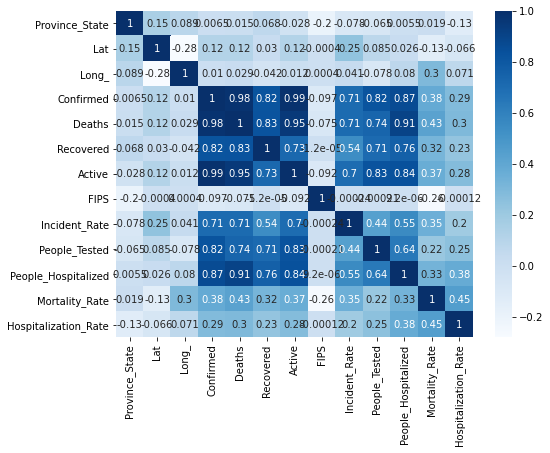

In [170]:
plt.figure(figsize=(8,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

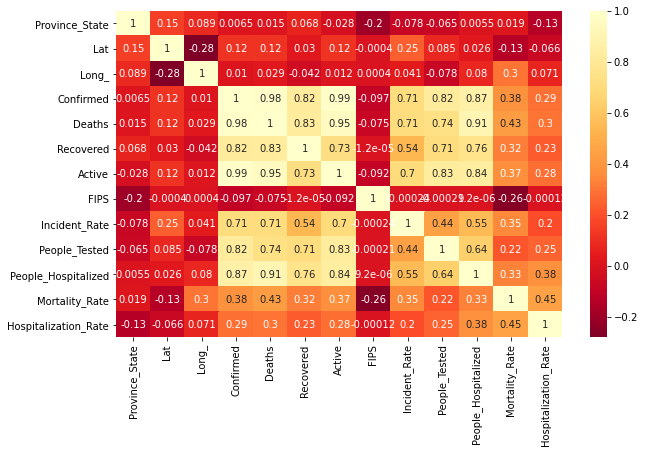

In [171]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

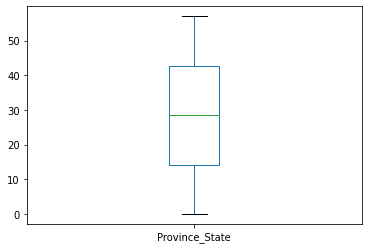

In [172]:
#univariate analysis
df['Province_State'].plot.box()

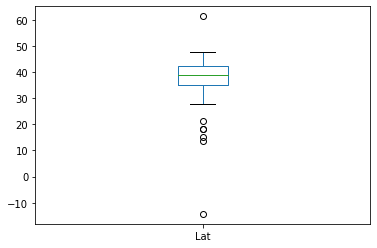

In [173]:
df['Lat'].plot.box()

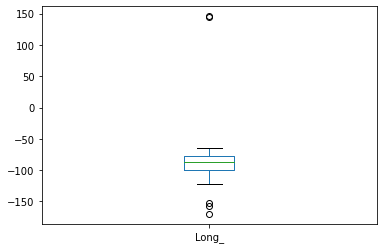

In [174]:
df['Long_'].plot.box()

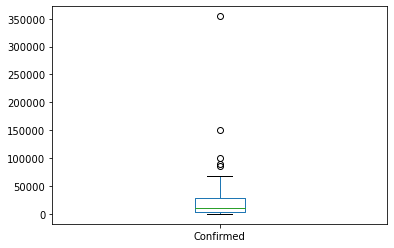

In [175]:
df['Confirmed'].plot.box()

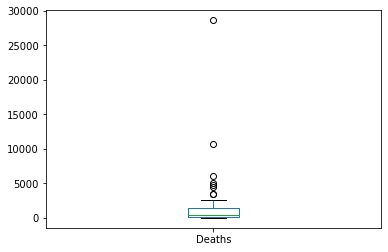

In [176]:
df['Deaths'].plot.box()

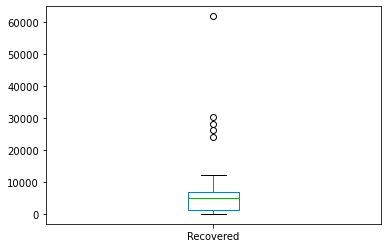

In [177]:
df['Recovered'].plot.box()

In [178]:
collist=df.columns.values
ncol=12
nrows=10

In [179]:
plt.subplot?

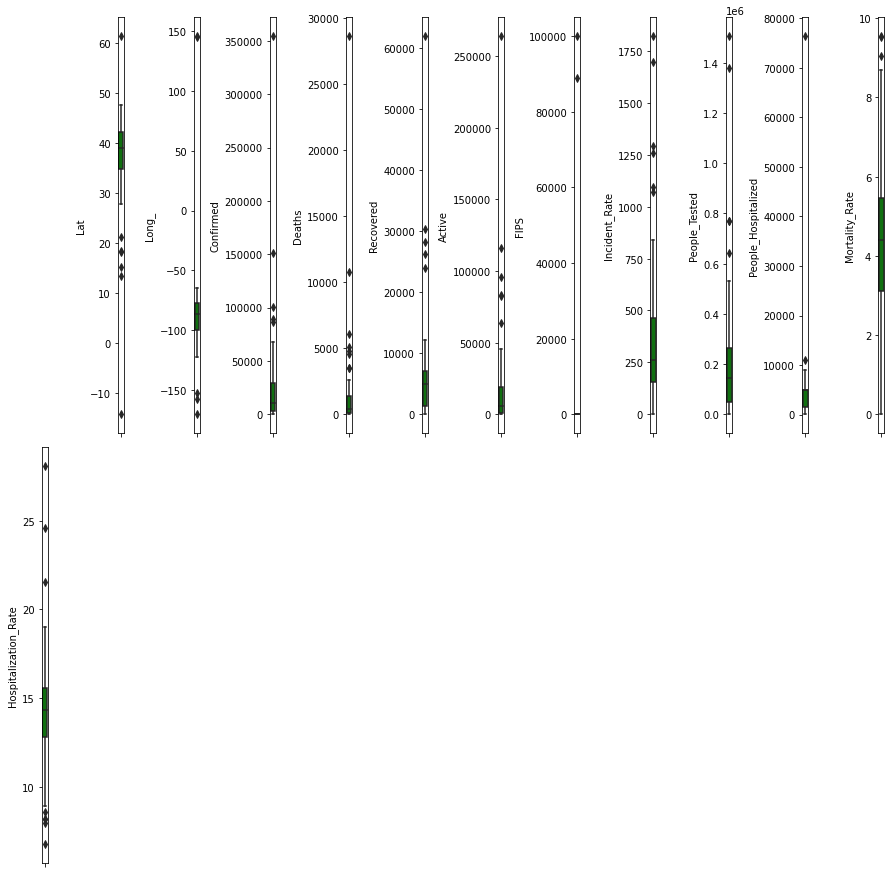

In [180]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

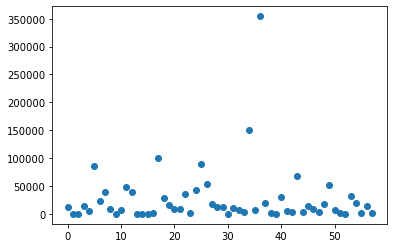

In [181]:
#bivariate analysis
plt.scatter(df['Province_State'],df['Confirmed'])

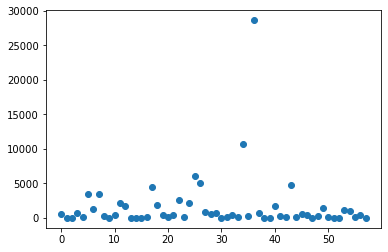

In [182]:
plt.scatter(df['Province_State'],df['Deaths'])

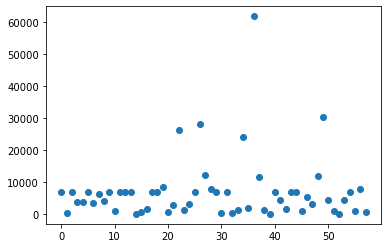

In [183]:
plt.scatter(df['Province_State'],df['Recovered'])

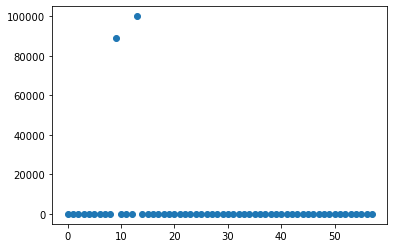

In [184]:
plt.scatter(df['Province_State'],df['FIPS'])

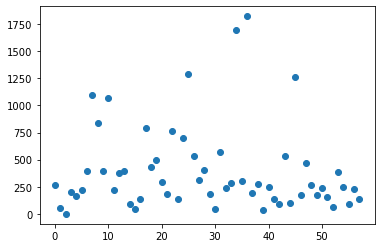

In [185]:
plt.scatter(df['Province_State'],df['Incident_Rate'])

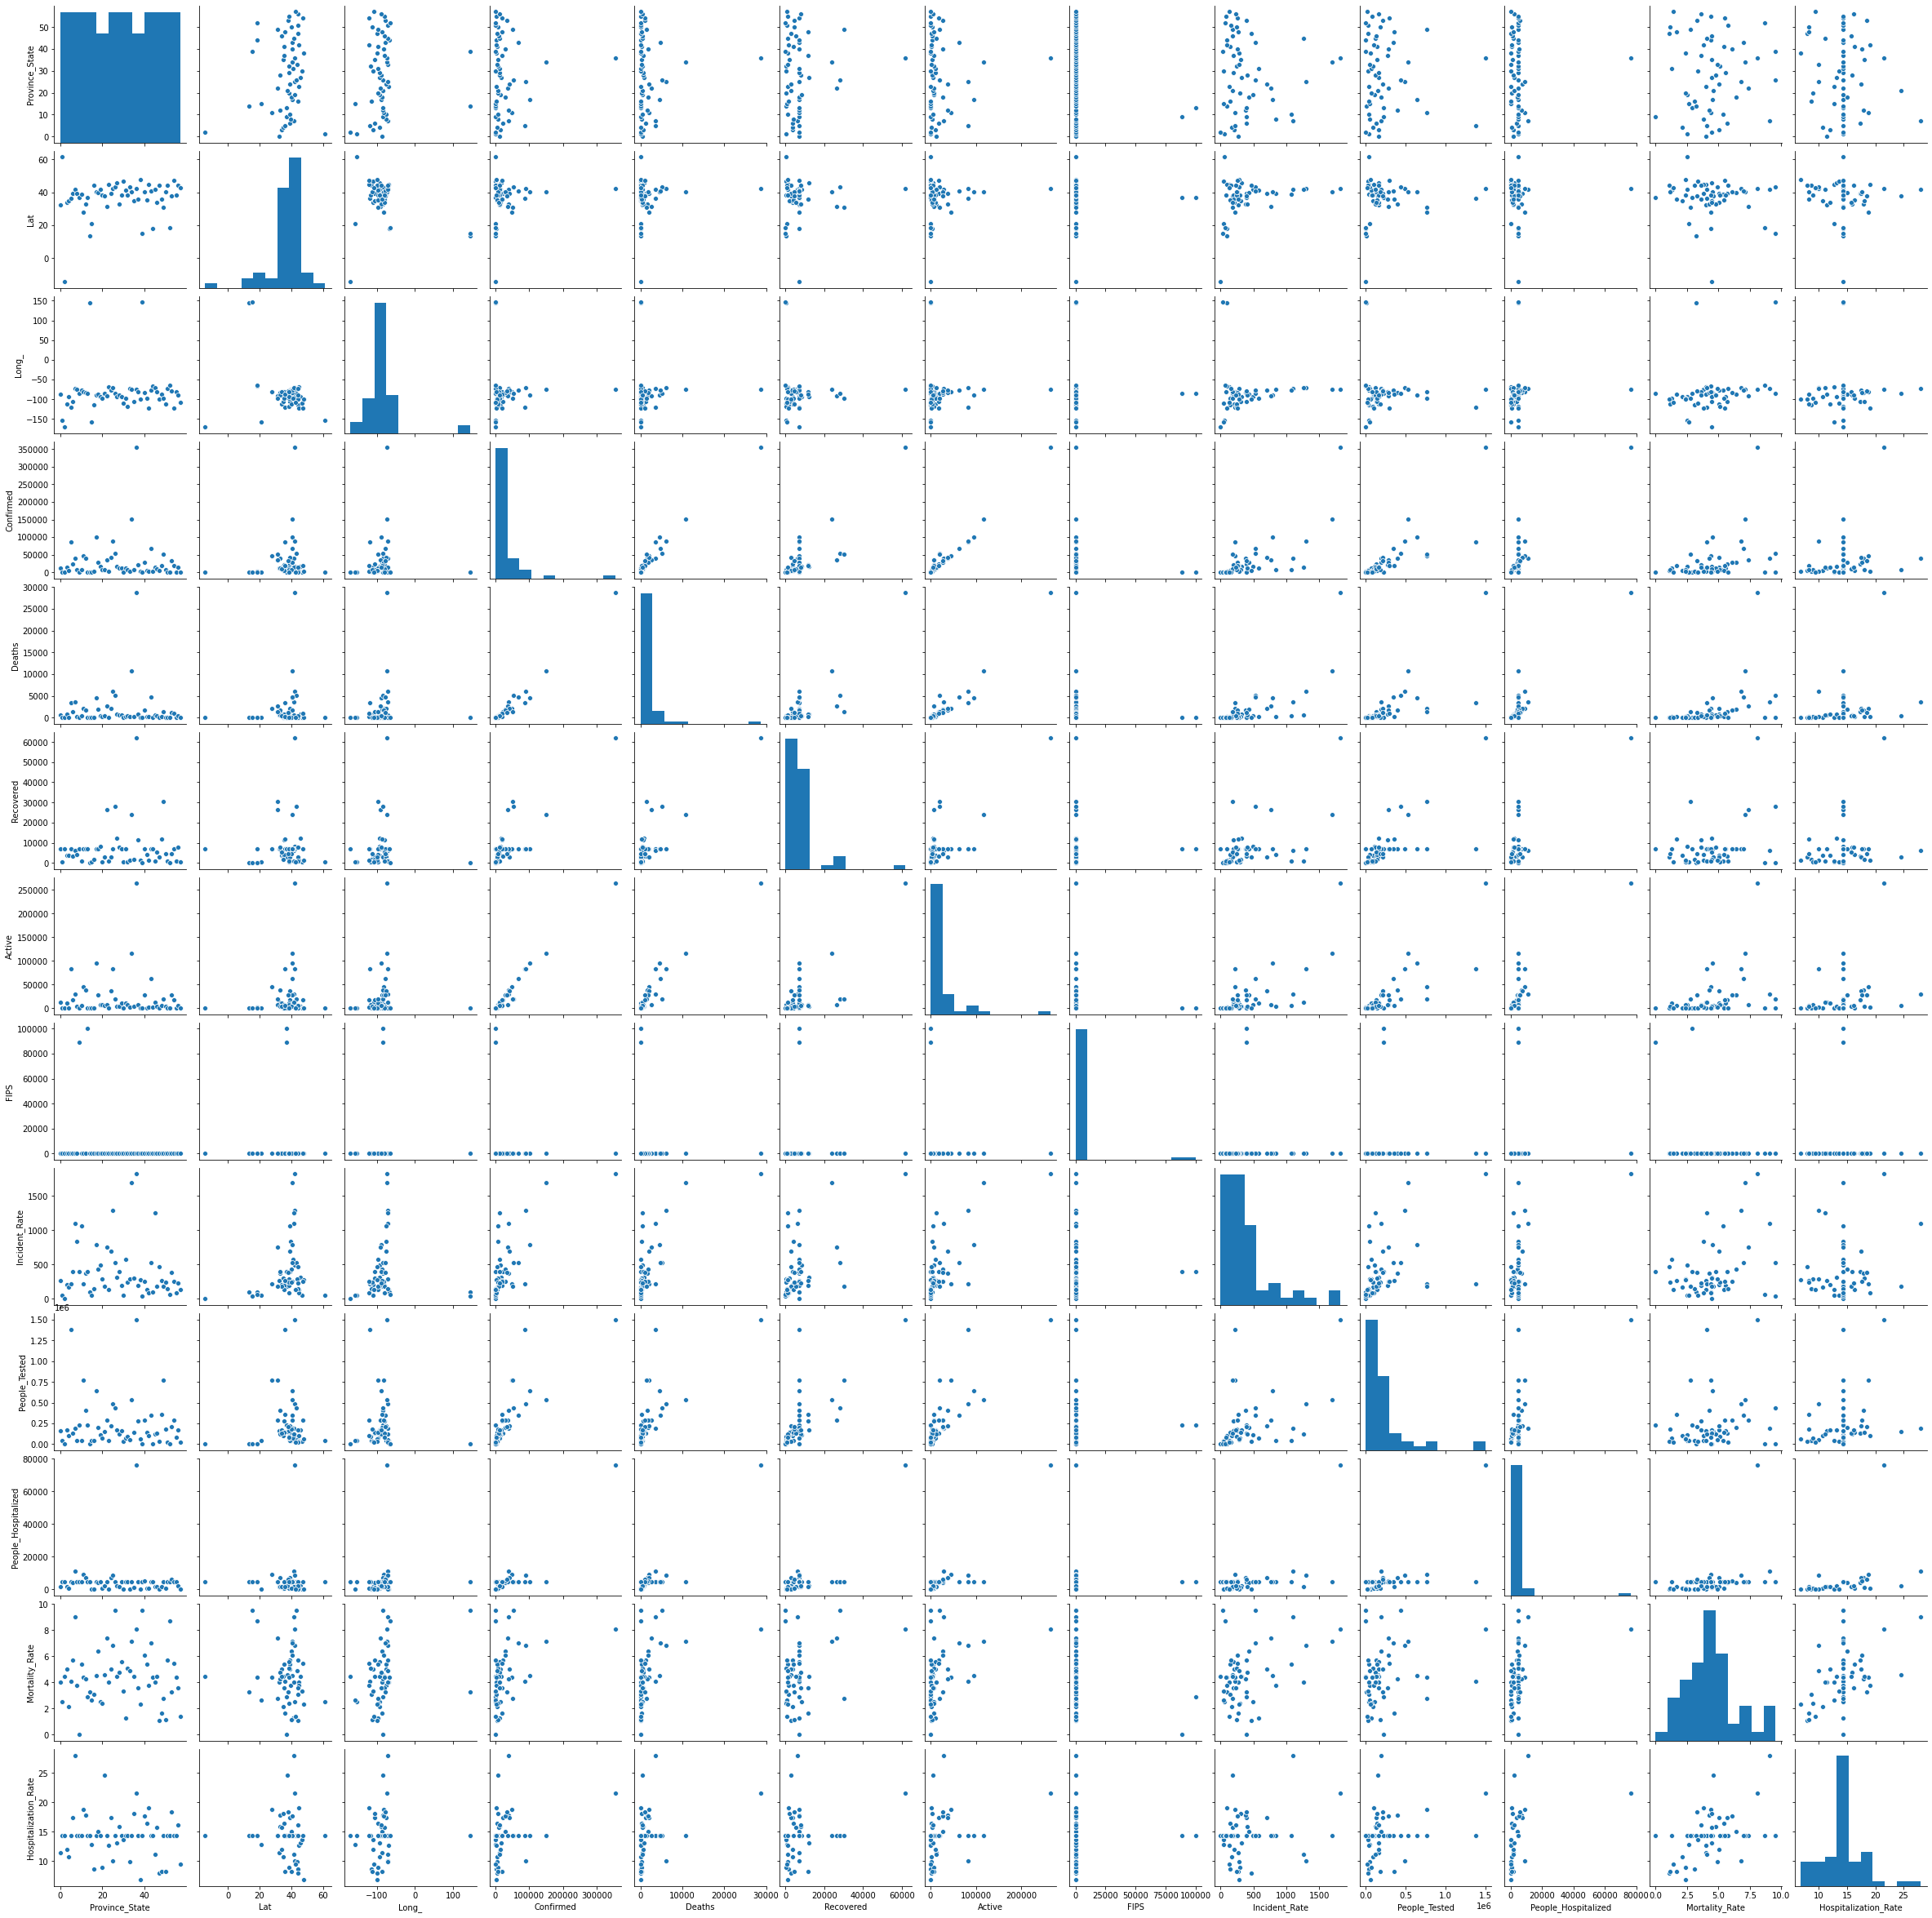

In [186]:
sns.pairplot(df)

In [187]:
df.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,11.438860
1,1,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,14.342541
2,2,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,14.342541
3,3,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,12.022005
4,4,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,10.693584


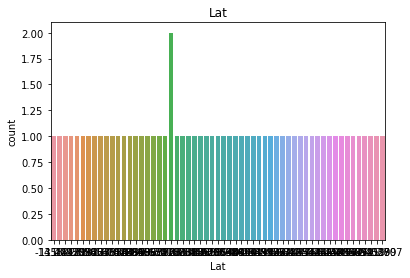

In [188]:
# Plotting the "Lat" Column

import seaborn as sn
sn.countplot(df["Lat"])
plt.title("Lat")
plt.show()

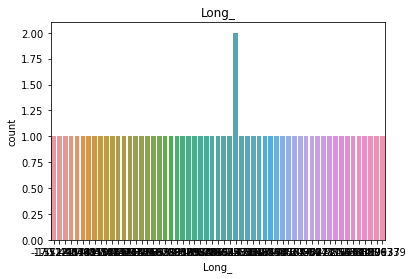

In [189]:
sn.countplot(df["Long_"])
plt.title("Long_")
plt.show()

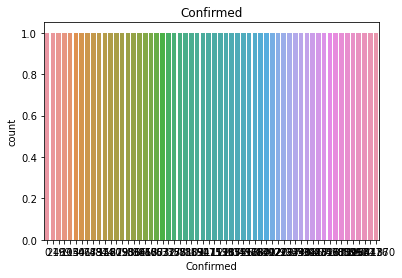

In [190]:
sn.countplot(df["Confirmed"])
plt.title("Confirmed")
plt.show()

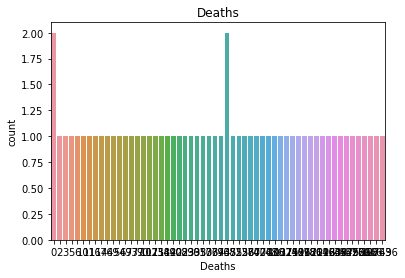

In [191]:
sn.countplot(df["Deaths"])
plt.title("Deaths")
plt.show()

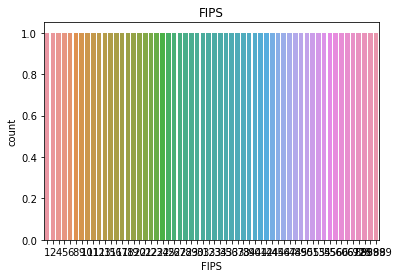

In [192]:
sn.countplot(df["FIPS"])
plt.title("FIPS")
plt.show()

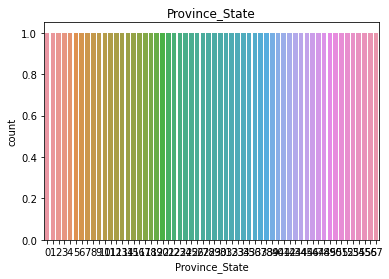

In [193]:
sn.countplot(df["Province_State"])
plt.title("Province_State")
plt.show()

In [194]:
# To check distribution of skewness

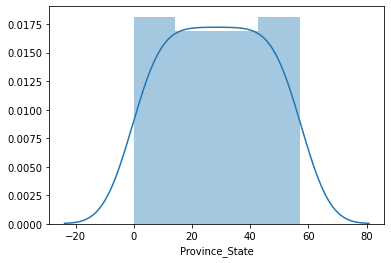

In [195]:
sns.distplot(df['Province_State'])

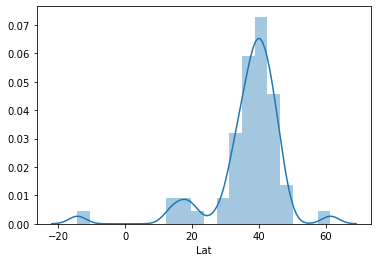

In [196]:
sns.distplot(df['Lat'])

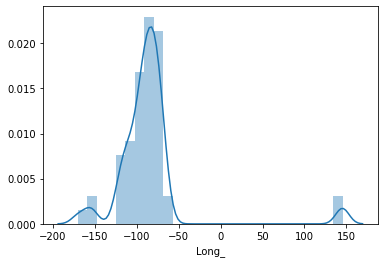

In [197]:
sns.distplot(df['Long_'])

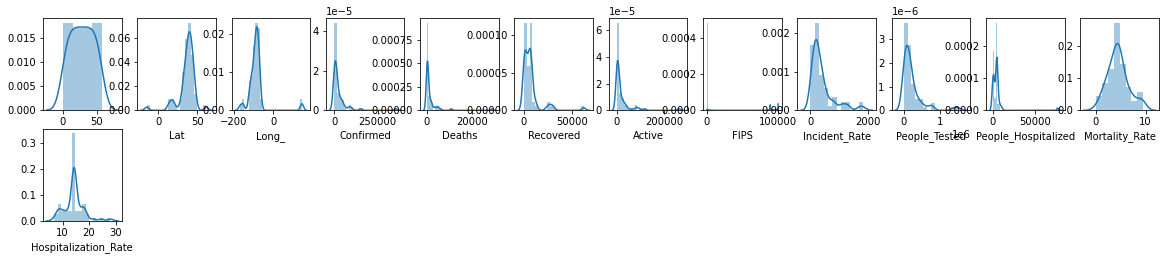

In [198]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [199]:
df.shape

(58, 13)

In [200]:
df.skew()

Province_State          0.000000
Lat                    -2.250097
Long_                   3.567919
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
Hospitalization_Rate    0.867341
dtype: float64

In [201]:
y=df.iloc[:,0]
y

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
52    52
53    53
54    54
55    55
56    56
57    57
Name: Province_State, dtype: int32

In [202]:
x =df.iloc[:,1:13]
x

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Hospitalization_Rate
0,32.318200,-86.902300,13052,522,7007.428571,12530.0,1,266.194321,1.644500e+05,1493.000000,3.999387,11.438860
1,61.370700,-152.404400,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,2.493766,14.342541
2,-14.271000,-170.132000,0,0,7007.428571,0.0,60,0.000000,1.240000e+02,4897.454545,4.458248,14.342541
3,33.729800,-111.431200,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,5.011405,12.022005
4,34.969700,-92.373100,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,2.138717,10.693584
5,36.116200,-119.681600,85997,3497,7007.428571,82500.0,6,217.646575,1.380120e+06,4897.454545,4.066421,14.342541
6,39.059800,-105.311100,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,5.698118,17.348774
7,41.597800,-72.755400,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,9.044775,28.054438
8,39.318500,-75.507100,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,3.783256,14.342541
9,36.840089,-85.206614,49,0,7007.428571,49.0,88888,396.230806,2.258534e+05,4897.454545,0.000000,14.342541


In [203]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

In [204]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.22,random_state=55)

In [205]:
print(x_train.shape, '\t',x_test.shape)

(45, 12) 	 (13, 12)


In [206]:
print(y_train.shape, '\t' ,y_test.shape)

(45,) 	 (13,)


In [207]:
# Importing our Model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [208]:
# using algrithms via for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m, 'is :', m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score: ",r2_score(y_test,predm))
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is : 0.2942218493202844
Error:
Mean absolute error: 28.45470217725778
Mean squared error: 1088.7328599814084
Root Mean Squared Error: 32.99595217570495
r2_score:  -1.7134829715794302
*************************************************************************************************************


Score of DecisionTreeRegressor() is : 1.0
Error:
Mean absolute error: 3.769230769230769
Mean squared error: 21.76923076923077
Root Mean Squared Error: 4.665750825883308
r2_score:  0.9457438650306749
*************************************************************************************************************


Score of KNeighborsRegressor() is : 0.2279764346784383
Error:
Mean absolute error: 18.23076923076923
Mean squared error: 399.6523076923077
Root Mean Squared Error: 19.991305802580975
r2_score:  0.003934049079754476
*************************************************************************************************************


Score of SVR() is : 0.06209238373144321

In [210]:
# Cross Validate the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('Score of',m, 'is :')
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is :
Score: [-5.01243791e+07 -1.40597785e+01 -3.57551451e+01 -5.72846098e+01]
Mean Score: -12531121.549069762
Standard deviation: 21704477.364871033
*************************************************************************************************************


Score of DecisionTreeRegressor() is :
Score: [-27.76428571  -2.75357143  -5.36483516  -7.25054945]
Mean Score: -10.78331043956044
Standard deviation: 9.93315791143125
*************************************************************************************************************


Score of KNeighborsRegressor() is :
Score: [-48.01314286  -7.45528571  -8.37863736 -45.17424176]
Mean Score: -27.25532692307692
Standard deviation: 19.3671466138761
*************************************************************************************************************


Score of SVR() is :
Score: [-45.45646662 -11.00440571 -13.6040063  -53.31042656]
Mean Score: -30.843826298678238
Standard deviation: 18.768933022544445
***

In [212]:
# Ridge model is giving best result so finding its best parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [214]:
# Using Ridge model with best results

ridge = Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)
print('Score:',ridge.score(x_train,y_train))
predrd=ridge.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrd))
print('Mean squared error :', mean_squared_error(y_test,predrd))
print('Root Mean Squared error:',mean_squared_error(y_test,predrd))
print("\n")
print("r2_score:",r2_score(y_test,predrd))

Score: 0.24495952325520287


Mean absolute error: 25.02195794850111
Mean squared error : 886.6305255182137
Root Mean Squared error: 886.6305255182137


r2_score: -1.2097769999495358


In [216]:
# cross Validate Ridge

score=cross_val_score(ridge,x,y,cv=4,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [-52.32988944 -15.29370102 -19.92344858 -55.977433  ]
Mean Score: -35.88111801205511
Standard deviation: 18.390982231241413


In [217]:
# Using Ensemble Technique to Boostup our score

In [218]:
# Using Random Forest

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error :', mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print("r2_score:",r2_score(y_test,predrf))

Score: 0.9594278978699312


Mean absolute error: 4.688461538461538
Mean squared error : 83.64134615384616
Root Mean Squared Error: 9.145564288432189


r2_score: 0.7915380559815951


In [219]:
# Using Ada Boost

from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predadb))
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predadb)))
print('\n')
print("r2_score:",r2_score(y_test,predadb))

Score: 0.17835162174763475


Mean absolute error: 20.807671639259866
Mean squared error: 528.5877486726393
Root Mean Squared Error: 22.99103626791623


r2_score: -0.3174157846519001


In [220]:
# Cross Validate RandomForest Regressor

score=cross_val_score(rf,x,y,cv=4,scoring='r2')
print("score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

score: [-26.36877679  -2.976625    -4.40368132 -16.28854945]
Mean Score: -12.509408138736266
Standard deviation: 9.525502217718275


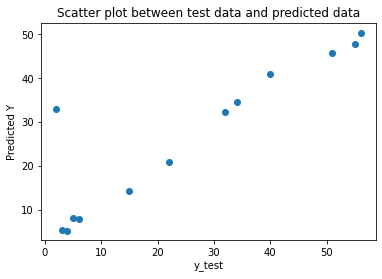

In [221]:
#plotting scatter plot between test data and predicted data for Ada Boost

plt.scatter(y_test,predrf)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title("Scatter plot between test data and predicted data")
plt.show()

In [222]:
#Saving the RandomForest Regressor

In [223]:
df1=pd.DataFrame(predrf)
df1.to_csv('rf2_predicton.csv')

In [224]:
import joblib
joblib.dump(rf,'covid_19.pkl')

['covid_19.pkl']